<a href="https://colab.research.google.com/github/MonteiroAlvesMatheus/TCC/blob/main/Artigo_IEEE_Treinamento_CNN_SIMPLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instalando o a biblioteca pydicom
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.2 MB/s eta 0:00:00


In [ ]:
#importando as bibliotecas
import pandas as pd
import os
import numpy as np
import random
import pydicom as dicom
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import subprocess
from PIL import Image
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from tensorflow.keras.metrics import CategoricalAccuracy, AUC, Precision, Recall
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#descompactando o banco de dados
!unzip "/content/drive/MyDrive/TCC/ds-parte1.zip"
!unzip "/content/drive/MyDrive/TCC/ds-parte2.zip"

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-38/CAP_SCD0004201_MR__hrt_raw_20120813124049187_3.dcm  
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-38/SCD0004201.log  
   creating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-44/
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-44/CAP_SCD0004201_MR__hrt_raw_20120813124049210_4.dcm  
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-44/SCD0004201.log  
   creating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-51/
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-51/C

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TCC/df_geral.csv')

In [ ]:
df

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
0,SCD0000101,/content/SCD0000101/1.368_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120614731_1...,-y-z,128x128,Infarto
1,SCD0000101,/content/SCD0000101/1.368_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120614681_1...,-y-z,128x128,Infarto
2,SCD0000101,/content/SCD0000101/1.368_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120614746_2...,-y-z,128x128,Infarto
3,SCD0000101,/content/SCD0000101/1.368_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120614586_8...,-y-z,128x128,Infarto
4,SCD0000101,/content/SCD0000101/1.368_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120614519_3...,-y-z,128x128,Infarto
...,...,...,...,...,...,...
51540,SCD0004501,/content/SCD0004501/1.172_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124303789_1...,-x-z,256x256,Normal
51541,SCD0004501,/content/SCD0004501/1.216_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124308276_2...,-x-z,256x256,Normal
51542,SCD0004501,/content/SCD0004501/1.216_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124305580_2...,-x-z,256x256,Normal
51543,SCD0004501,/content/SCD0004501/1.216_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124308079_1...,-x-z,256x256,Normal


In [ ]:
train_data, test_data = train_test_split(df, test_size=0.5, random_state=42)

In [ ]:
train_data

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
48546,SCD0004301,/content/SCD0004301/1.532_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004301_MR__hrt_raw_20120813124134214_3...,-y-z,256x256,Normal
1947,SCD0000301,/content/SCD0000301/1.452_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0000301_MR__hrt_raw_20120813120711152_5...,-x-z,256x256,Infarto
15933,SCD0001401,/content/SCD0001401/1.071_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0001401_MR__hrt_raw_20120813121645565_3...,-x-z,256x256,Insuficiencia
47567,SCD0004201,/content/SCD0004201/1.32_2YMAJdAczcjAfXpHFLC6Z...,CAP_SCD0004201_MR__hrt_raw_20120813124027099_3...,-x-y,64x64,Normal
26059,SCD0002301,/content/SCD0002301/1.532_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0002301_MR__hrt_raw_20120813122425951_2...,-x-z,256x256,Insuficiencia
...,...,...,...,...,...,...
11284,SCD0001101,/content/SCD0001101/1_29sSOG9riFiQfXpHFLC6Zj45...,CAP_SCD0001101_MR__hrt_raw_20120813121323041_1...,-x-z,128x128,Infarto
44732,SCD0004001,/content/SCD0004001/1.244_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004001_MR__hrt_raw_20120813123911346_1...,+y-z,256x256,Normal
38158,SCD0003401,/content/SCD0003401/1.368_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0003401_MR__hrt_raw_20120813123417292_2...,-y-z,128x128,Hipertrofia
860,SCD0000101,/content/SCD0000101/3.268_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120614096_4...,-y-z,256x256,Infarto


In [ ]:
test_data

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
37940,SCD0003401,/content/SCD0003401/1.504_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0003401_MR__hrt_raw_20120813123418874_2...,-z-x,256x256,Hipertrofia
39483,SCD0003501,/content/SCD0003501/1.32_2YMAJdAczcjAfXpHFLC6Z...,CAP_SCD0003501_MR__hrt_raw_20120813123456891_5...,-x-y,64x64,Hipertrofia
13035,SCD0001201,/content/SCD0001201/1.648_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0001201_MR__hrt_raw_20120813121508032_2...,+y-z,256x256,Infarto
17954,SCD0001601,/content/SCD0001601/1.232_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0001601_MR__hrt_raw_20120813121818548_4...,-y-z,256x256,Insuficiencia
10079,SCD0001001,/content/SCD0001001/1.652_29sSOG9riFiQfXpHFLC6...,CAP_SCD0001001_MR__hrt_raw_20120813121201827_3...,+x+x,256x256,Infarto
...,...,...,...,...,...,...
26565,SCD0002401,/content/SCD0002401/1.472_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0002401_MR__hrt_raw_20120813122510755_1...,-x-y,256x256,Insuficiencia
16303,SCD0001501,/content/SCD0001501/1.476_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0001501_MR__hrt_raw_20120813121722490_6...,-x-y,64x64,Insuficiencia
42339,SCD0003801,/content/SCD0003801/1.368_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0003801_MR__hrt_raw_20120813123749279_1...,-x-y,128x128,Normal
50032,SCD0004401,/content/SCD0004401/1.612_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124223871_7...,-x-z,256x256,Normal


In [ ]:
rotulo = {'Infarto': 0, 'Insuficiencia': 1, 'Hipertrofia': 2, 'Normal': 3}

In [ ]:
#Parametros

batch_size = 32
tam_img = 256
classes = 4

In [ ]:
data_teste=[]
target_teste=[]

for n in range(len(train_data)):
  end_imgs = train_data['Caminho das imagens'].iloc[n]
  ds=dicom.dcmread(end_imgs)
  dcm_sample=ds.pixel_array
  img_resize = cv2.resize((np.uint8(dcm_sample/np.max(dcm_sample))),dsize =(tam_img,tam_img))
  data_teste.append(img_resize) #Normalizado entre 0 e 1
  target_teste.append(rotulo[train_data['Classe'].iloc[n]]) #rotulando as imagens de acordo com as classes

NameError: ignored

In [ ]:
data_teste = np.array(data_teste)
data_teste = np.reshape(data_teste, (data_teste.shape[0],tam_img,tam_img,1)) #corrigindo a dimensão da imagem pra 256x256x1
target_teste = np.array(target_teste)
target_teste= np_utils.to_categorical(target_teste)

In [ ]:
def batch_generator(df, batch_size, _mode, label_set, tam_img):
      while True:
          # Depending on mode select DataFrame with paths
          if _mode == 'train':
              ids = random.sample(range(df.shape[0]), df.shape[0])
          elif _mode == 'val':
              ids = list(range(df.shape[0]))
          else:
              raise ValueError('The mode should be either train or val.')

          # Create batches (for training data the batches are randomly permuted)
          for start in range(0, len(ids), batch_size):
              X_batch = []
              y_batch = []
              end = min(start + batch_size, len(ids))
              i_batch = ids[start:end]
              for i in i_batch:
                  end_imgs = df['Caminho das imagens'].iloc[i]
                  ds=dicom.dcmread(end_imgs)
                  dcm_sample=ds.pixel_array
                  img_resize = cv2.resize((np.float32(dcm_sample/np.max(dcm_sample))),dsize =(tam_img,tam_img))
                  X_batch.append(img_resize)
                  y_batch.append(label_set[df['Classe'].iloc[i]])
              X_batch = np.array(X_batch)
              X_batch = np.reshape(X_batch, (X_batch.shape[0],tam_img, tam_img, 1)) #corrigindo a dimensão da imagem pra 256x256x1

              y_batch = np_utils.to_categorical(y_batch, num_classes = len(label_set))
              yield (X_batch, y_batch)

In [ ]:
# define modelo
model = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), strides = (1,1),padding='same', input_shape=(tam_img,tam_img,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'),
    keras.layers.Conv2D(16, (3, 3), strides = (1,1), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(classes, activation='softmax')
])

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001) #Learning Rate escolhido no artigo

In [ ]:
metricasEscolhidas = [CategoricalAccuracy(name='acc'),
                      AUC(name='auc'),
                      Precision(name='precision'),
                      Recall(name='recall')]

In [ ]:
# compila do modelo
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=metricasEscolhidas)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       80        
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 256, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 16)     6

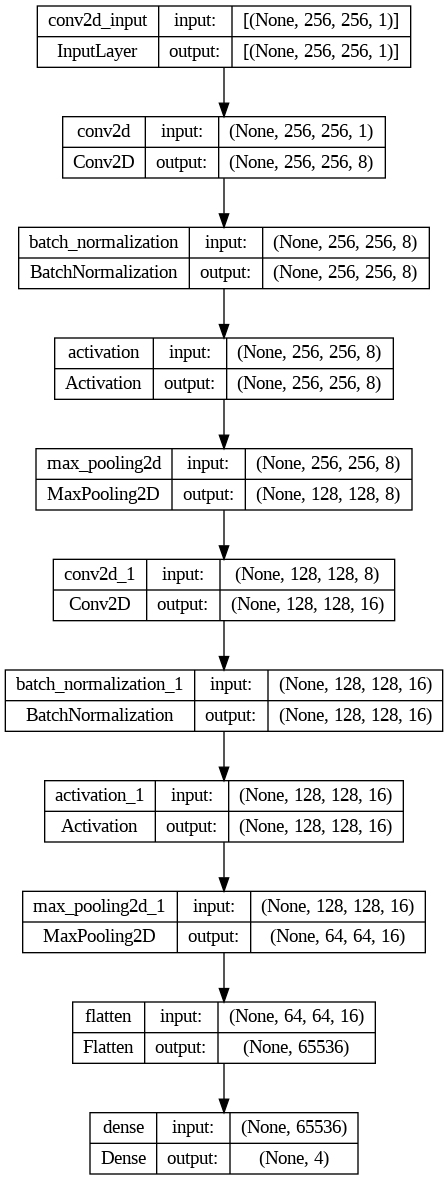

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model ', monitor = 'val_loss',verbose=1,save_best_only=True,mode='auto',save_weights_only=True)
es = EarlyStopping(monitor='val_loss', verbose=1, patience=5)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=25, min_lr=1e-10)
# callbacks_list = [checkpoint,es,reduce_lr]
callbacks_list = [checkpoint,es]

In [ ]:
history = model.fit(batch_generator(train_data, batch_size, _mode='train', label_set=rotulo, tam_img=tam_img),
                        steps_per_epoch=int(np.ceil(len(train_data)/batch_size)),
                        epochs=5, verbose=1,
                        callbacks=callbacks_list,
                        validation_data=batch_generator(test_data, batch_size, _mode='val', label_set=rotulo, tam_img=tam_img),
                        validation_steps=int(np.ceil(len(test_data)/batch_size))
                    )

Epoch 1/5
806/806 [==============================] - ETA: 0s - loss: 1.1518 - acc: 0.7855 - auc: 0.9242 - precision: 0.7946 - recall: 0.7794
Epoch 1: val_loss improved from inf to 0.19923, saving model to model-001.model 
806/806 [==============================] - 236s 277ms/step - loss: 1.1518 - acc: 0.7855 - auc: 0.9242 - precision: 0.7946 - recall: 0.7794 - val_loss: 0.1992 - val_acc: 0.9418 - val_auc: 0.9916 - val_precision: 0.9481 - val_recall: 0.9377
Epoch 2/5
806/806 [==============================] - ETA: 0s - loss: 0.1723 - acc: 0.9469 - auc: 0.9933 - precision: 0.9537 - recall: 0.9414
Epoch 2: val_loss did not improve from 0.19923
806/806 [==============================] - 216s 268ms/step - loss: 0.1723 - acc: 0.9469 - auc: 0.9933 - precision: 0.9537 - recall: 0.9414 - val_loss: 0.2632 - val_acc: 0.9150 - val_auc: 0.9874 - val_precision: 0.9223 - val_recall: 0.9109
Epoch 3/5
805/806 [============================>.] - ETA: 0s - loss: 0.0884 - acc: 0.9696 - auc: 0.9981 - precis

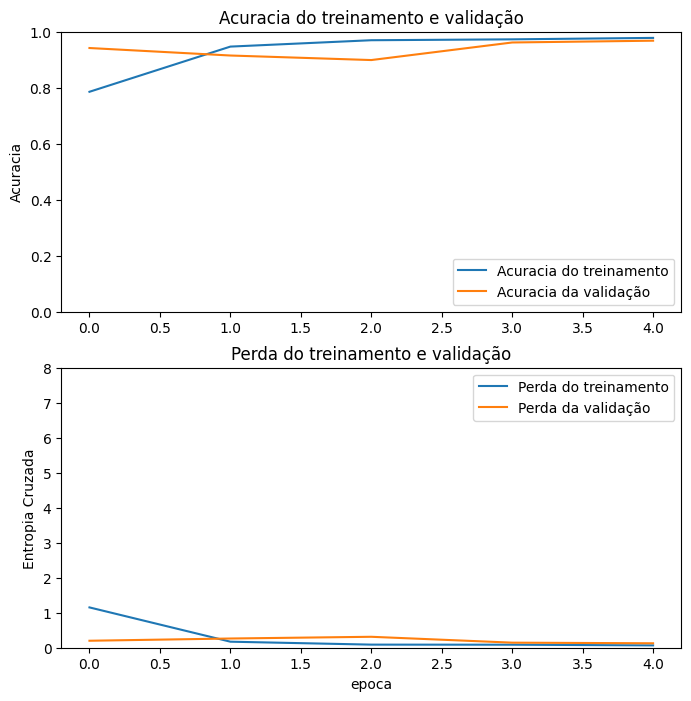

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Acuracia do treinamento')
plt.plot(val_acc, label='Acuracia da validação')
plt.legend(loc='lower right')
plt.ylabel('Acuracia')
plt.ylim([0,1])
plt.title('Acuracia do treinamento e validação')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Perda do treinamento')
plt.plot(val_loss, label='Perda da validação')
plt.legend(loc='upper right')
plt.ylabel('Entropia Cruzada')
plt.ylim([0,8])
plt.title('Perda do treinamento e validação')
plt.xlabel('epoca')
plt.show()

In [ ]:
model.evaluate(data_teste,target_teste)

806/806 [==============================] - 7s 8ms/step - loss: 3.8267 - acc: 0.3018 - auc: 0.5642 - precision: 0.3445 - recall: 0.1321


[3.8266940116882324,
 0.30178868770599365,
 0.5642285346984863,
 0.3444612920284271,
 0.13211500644683838]

806/806 [==============================] - 5s 6ms/step


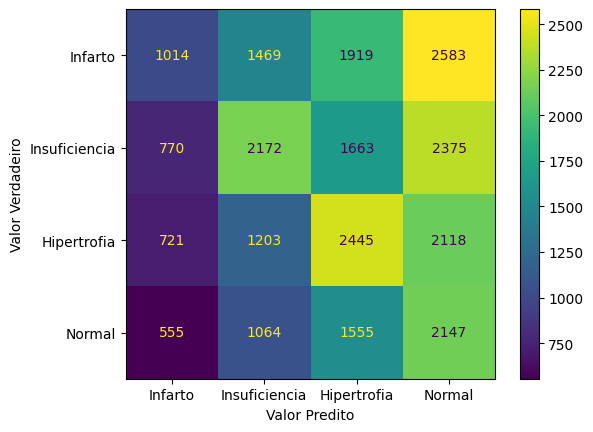

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(data_teste)

y_true = [np.argmax(y, axis=None, out=None) for y in target_teste]
y_true = np.array(y_true)

y_hat = [np.argmax(y, axis=None, out=None) for y in y_pred]
y_hat = np.array(y_hat)

confusion = confusion_matrix(y_true, y_hat)


ConfusionMatrixDisplay(confusion, display_labels=rotulo).plot()
plt.grid(False)
plt.xlabel("Valor Predito")
plt.ylabel("Valor Verdadeiro")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_hat, digits=4))

              precision    recall  f1-score   support

           0     0.3314    0.1452    0.2019      6985
           1     0.3676    0.3112    0.3371      6980
           2     0.3225    0.3769    0.3476      6487
           3     0.2328    0.4035    0.2952      5321

    accuracy                         0.3018     25773
   macro avg     0.3136    0.3092    0.2954     25773
weighted avg     0.3186    0.3018    0.2944     25773

